In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
port_path = "/Users/mariana.naude/Documents/Diplomado/Modulo 5/PreciosPortf.xlsx"
data = pd.read_excel(port_path, index_col=0)

rend = data.pct_change().dropna()

rend_ports = rend.mean() * 252
rend_ports

ASURB MF Equity       0.123539
GFNORTEO MF Equity    0.078811
PE&OLES* MF Equity    0.111053
WALMEX* MF Equity     0.082426
IENOVA* MF Equity     0.078997
dtype: float64

In [4]:
weights = np.random.random(5)
weights /= sum(weights)
weights

array([0.22857174, 0.20055899, 0.13060723, 0.23701766, 0.20324437])

In [5]:
sum(weights)

1.0000000000000004

In [6]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [7]:
port_rend(weights, rend), port_vol(weights, rend)

(0.09414034231902338, 0.1619576978431001)

In [55]:
N, M = rend.shape
w0  = np.random.randn(M)
weightslim= (.2 - .05) * w0 + .05
weightslim/=sum(weightslim)
    

def sum_weights(weightslim):
    return weightslim.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

e0 = 0.1
constraints = [
    {"type": "eq", "fun": sum_weights},
    {"type": "eq", "fun": lambda w: rend_esperado(w, e0)}
]

port1 = minimize(port_vol, weightslim, constraints=constraints, args=rend)
port1

     fun: 0.15715184274897362
     jac: array([0.17774638, 0.1382826 , 0.16642776, 0.14182861, 0.13890218])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.37307792, 0.00595736, 0.10695177, 0.27936212, 0.23465084])

In [56]:
wp1 = port1.x
port_rend(wp1, rend), port_vol(wp1, rend)

(0.09999999995043879, 0.15715184274897362)

In [57]:
r_min = port_rend(wp1, rend)
r_max = rend_ports.max()

rend_max = np.linspace(r_min, r_max)

In [58]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)},
    ]

    port1 = minimize(port_vol, weightslim, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

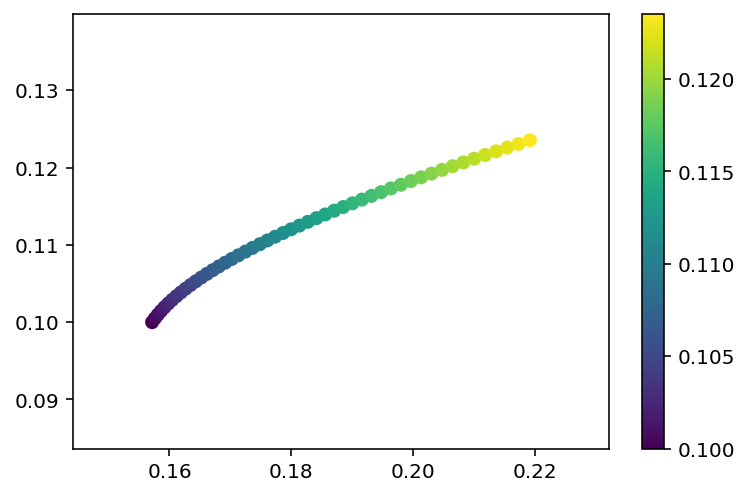

In [59]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()